# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics

# Load Dataset

In [ ]:
df = pd.read_csv('seattle-weather.csv')

In [ ]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


# Pre-processing

## Missing Value

In [ ]:
df.isna().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


## Tipe Data

In [ ]:
# Mengecek tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


## Duplicate Value

In [ ]:
# Cek jumlah data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

# Lihat baris yang duplikat
if df.duplicated().any():
    print("\nBaris duplikat:")
    print(df[df.duplicated()])

Jumlah data duplikat: 0


## Delete Unnecessary Column

In [ ]:
# Menghapus kolom 'date'
df = df.drop(columns=['date'])

## Encoding Target Column

### With Ordinal Encoder

Alphabetical (drizzle, fog, ...)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# # Tentukan urutan kategori
# categories_order = [['rain', 'sun', 'drizzle', 'snow', 'fog']]

# Inisialisasi OrdinalEncoder
encoder = OrdinalEncoder()

# Ordinal Encoding
df['weather_encoded'] = encoder.fit_transform(df[['weather']])

In [ ]:
df.head(10)

,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,0.0,12.8,5.0,4.7,drizzle,0.0
1,10.9,10.6,2.8,4.5,rain,2.0
2,0.8,11.7,7.2,2.3,rain,2.0
3,20.3,12.2,5.6,4.7,rain,2.0
4,1.3,8.9,2.8,6.1,rain,2.0
5,2.5,4.4,2.2,2.2,rain,2.0
6,0.0,7.2,2.8,2.3,rain,2.0
7,0.0,10.0,2.8,2.0,sun,4.0
8,4.3,9.4,5.0,3.4,rain,2.0
9,1.0,6.1,0.6,3.4,rain,2.0


In [ ]:
df.drop(columns=['weather'], inplace=True)

In [ ]:
# Mengubah nama kolom 'weather_encoded' menjadi 'weather'
df = df.rename(columns={'weather_encoded': 'weather'})

# Menampilkan DataFrame setelah perubahan nama kolom
print(df)

      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7      0.0
1              10.9      10.6       2.8   4.5      2.0
2               0.8      11.7       7.2   2.3      2.0
3              20.3      12.2       5.6   4.7      2.0
4               1.3       8.9       2.8   6.1      2.0
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9      2.0
1457            1.5       5.0       1.7   1.3      2.0
1458            0.0       7.2       0.6   2.6      1.0
1459            0.0       5.6      -1.0   3.4      4.0
1460            0.0       5.6      -2.1   3.5      4.0

[1461 rows x 5 columns]


## Normalization

### With MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom kecuali 'weather'
columns_to_normalize = df.columns[df.columns != 'weather']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [ ]:
df.head(10)

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,0.387097,0.476378,0.472527,0.0
1,0.194991,0.327957,0.389764,0.450549,2.0
2,0.014311,0.357527,0.562992,0.208791,2.0
3,0.363148,0.370968,0.500000,0.472527,2.0
4,0.023256,0.282258,0.389764,0.626374,2.0
5,0.044723,0.161290,0.366142,0.197802,2.0
6,0.000000,0.236559,0.389764,0.208791,2.0
7,0.000000,0.311828,0.389764,0.175824,4.0
8,0.076923,0.295699,0.476378,0.329670,2.0
9,0.017889,0.206989,0.303150,0.329670,2.0


# Modelling

## Data Splitting

In [ ]:
# Split features (X) and target (y)
X = df.drop(columns=['weather'], axis=1)
y = df['weather']

# Membagi dataset menjadi training set dan validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Membuat Model

Mencari parameter terbaik dalam penerapan metode random forest ke dalam model menggunakan GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 5, 10, 20],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 150, 200, 250, 300]}
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=parameters)
grid.fit(X_train, y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})
0.8475881295623784
RandomForestClassifier(criterion='log_loss', max_depth=5)


In [ ]:
model = RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=250)

## Model Training

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=250)

## Membuat Prediksi

In [ ]:
predict = model.predict(X_test)

In [ ]:
predict

array([2., 2., 4., 4., 2., 2., 4., 2., 4., 2., 4., 2., 2., 4., 4., 2., 2.,
       4., 2., 4., 2., 4., 2., 4., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2.,
       4., 4., 2., 2., 2., 4., 2., 2., 2., 3., 2., 2., 4., 4., 2., 2., 2.,
       2., 2., 4., 4., 3., 2., 4., 2., 4., 4., 2., 4., 2., 2., 4., 4., 2.,
       2., 2., 2., 4., 4., 4., 4., 4., 2., 4., 2., 2., 2., 4., 4., 2., 2.,
       4., 4., 4., 2., 4., 4., 2., 2., 4., 4., 4., 2., 2., 4., 4., 2., 2.,
       2., 4., 4., 4., 4., 2., 2., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4.,
       4., 4., 2., 2., 2., 2., 2., 2., 4., 4., 4., 4., 2., 2., 2., 4., 4.,
       4., 2., 4., 4., 2., 4., 2., 2., 2., 3., 4., 4., 2., 4., 2., 4., 2.,
       4., 4., 4., 4., 2., 2., 4., 4., 2., 4., 4., 4., 4., 2., 4., 4., 4.,
       2., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 4.,
       4., 4., 2., 4., 4., 4., 4., 4., 2., 3., 2., 2., 4., 2., 4., 2., 2.,
       4., 2., 4., 4., 2., 2., 4., 2., 2., 2., 4., 4., 4., 4., 4., 2., 2.,
       2., 4., 4., 2., 4.

## Evaluasi Model

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.00      0.00      0.00        12
         2.0       0.98      0.95      0.96       133
         3.0       1.00      0.62      0.77         8
         4.0       0.82      1.00      0.90       130

    accuracy                           0.89       293
   macro avg       0.56      0.51      0.53       293
weighted avg       0.83      0.89      0.86       293
 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 2400x1600 with 0 Axes>

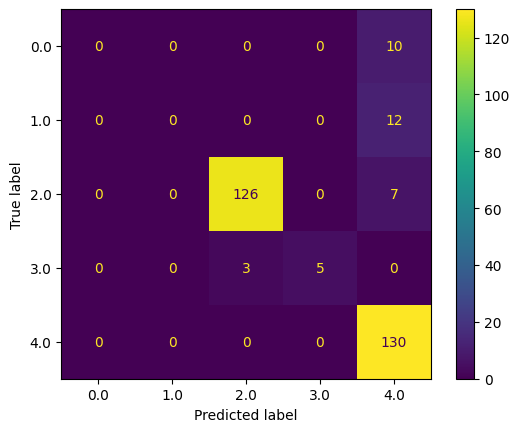

<Figure size 2400x1600 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
print(classification_report(y_test, predict), "\n")
plt.figure(figsize=(12,8), dpi=200)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy)

Accuracy: 0.8907849829351536


In [ ]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,0.387097,0.476378,0.472527,0.0
1,0.194991,0.327957,0.389764,0.450549,2.0
2,0.014311,0.357527,0.562992,0.208791,2.0
3,0.363148,0.370968,0.500000,0.472527,2.0
4,0.023256,0.282258,0.389764,0.626374,2.0


# Save Model

In [ ]:
import joblib

# ... your existing code ...

# Save the model using joblib
joblib.dump(model, 'model.joblib')

# To load the model later, use:
# loaded_model = joblib.load('model.joblib')


['model.joblib']